In [7]:
import tensorflow as tf

print("Tensorflow version is " + str(tf.__version__))

hello = tf.constant("Hello Tensor Flow")
sess = tf.Session()

print(sess.run(hello))

Tensorflow version is 1.7.0
b'Hello Tensor Flow'


In [1]:
import numpy as np
from keras import backend as kbe

data = kbe.variable(np.random.random((4,2)))
zero_data = kbe.zeros_like(data)
print(kbe.eval(zero_data))

Using TensorFlow backend.


[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [5]:
#   Imports
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Helper functions

#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

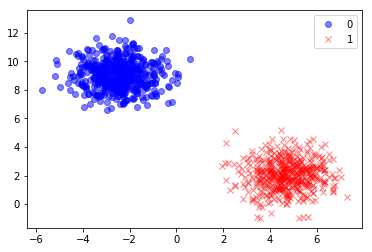

Epoch 1/100
700/700 [==============================] - 0s 410us/step - loss: 2.4124 - acc: 0.5114
Epoch 2/100
700/700 [==============================] - 0s 26us/step - loss: 0.0764 - acc: 0.9943
Epoch 3/100
700/700 [==============================] - 0s 26us/step - loss: 0.0285 - acc: 0.9986
Epoch 4/100
700/700 [==============================] - 0s 24us/step - loss: 0.0171 - acc: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 23us/step - loss: 0.0125 - acc: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 24us/step - loss: 0.0101 - acc: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 24us/step - loss: 0.0086 - acc: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 23us/step - loss: 0.0075 - acc: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 24us/step - loss: 0.0067 - acc: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 24us/step - loss: 0.0061 - acc: 1.0000
Epoch 11/100
700/700 [======

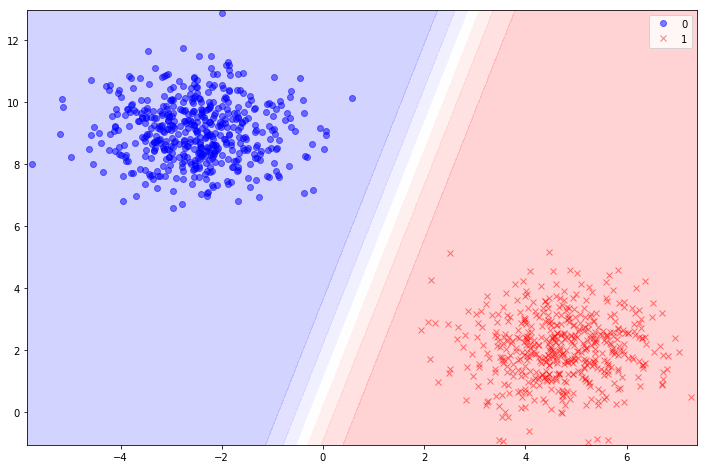

In [4]:

# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


#   Simple Sequential model
model = Sequential()
#   Add a Dense Fully Connected Layer with 1 neuron.  Using input_shape = (2,) says the input will 
#       be arrays of the form (*,2).  The first dimension will be an unspecified 
#       number of batches (rows) of data.  The second dimension is 2 which are the X, Y positions of each data element.
#       The sigmoid activation function is used to return 0 or 1, signifying the data 
#       cluster the position is predicted to belong to.
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1)
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()
